In [1]:
from pyspark.sql import SparkSession
import findspark
findspark.init('C:\spark-3.0.2-bin-hadoop2.7')

In [2]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import isnan
from pyspark.ml.classification import (LogisticRegression,DecisionTreeClassifier, 
                                       RandomForestClassifier)
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.types import IntegerType, StringType,DoubleType
from pyspark.sql.functions import *

In [3]:
spark=SparkSession.builder.master("local[2]").appName("ops").getOrCreate()
spark

In [5]:
data=spark.read.csv(r"D:\\BIGDATA\\credit.csv",inferSchema=True,header=True,sep= ",")
data.show(8)
data.printSchema()
data.count()

+----+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------+-----+
|Time|          V1|          V2|         V3|          V4|          V5|          V6|          V7|          V8|          V9|         V10|         V11|         V12|         V13|         V14|         V15|         V16|         V17|         V18|         V19|         V20|         V21|         V22|         V23|         V24|         V25|         V26|         V27|         V28|Amount|Class|
+----+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------

20244

In [6]:
data=data.dropDuplicates()
data.count()

20181

In [7]:
data=data.na.drop()
data.count()

20181

In [8]:
data.select([count(when(isnull(c) | isnan(c) , c)).alias(c) for c in data.columns]).show()
data.count()

+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|Time| V1| V2| V3| V4| V5| V6| V7| V8| V9|V10|V11|V12|V13|V14|V15|V16|V17|V18|V19|V20|V21|V22|V23|V24|V25|V26|V27|V28|Amount|Class|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|    0|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+



20181

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:\BIGDATA/credit.csv', header=0)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1


In [4]:
#droping NaN values
df = df.dropna()

In [5]:
#printing shape of the dataset
print (df.shape)

(20244, 31)


In [6]:
#selecting the columns
print(list(df.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [7]:
#drop columns which are not needed
df.drop(df.columns[[0, 3, 7, 8, 9, 10]], 
   axis = 1, inplace = True)

In [8]:
df.head()

,V1,V2,V4,V5,V6,V11,V12,V13,V14,V15,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,1.378155,-0.338321,0.462388,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.448154,0.060018,-0.082361,1.612727,1.065235,0.489095,-0.143772,0.635558,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,-1.358354,-1.340163,0.379780,-0.503198,1.800499,0.624501,0.066084,0.717293,-0.165946,2.345865,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,-0.863291,-0.010309,1.247203,-0.226487,0.178228,0.507757,-0.287924,-0.631418,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,0.403034,-0.407193,0.095921,-0.822843,0.538196,1.345852,-1.119670,0.175121,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1


In [9]:
# split train and test data
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


C:\Users\JAVERI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
#Random forest
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [12]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Training algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [85]:
#Evaluating Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16737948418885087
Mean Squared Error: 0.08666780530239539
Root Mean Squared Error: 0.2943939627478719


In [90]:
lr = RandomForestRegressor(n_estimators=50)
lr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
print('Accuracy: {:.2f}'.format(regressor.score(X_train, y_train)))

Accuracy: 0.83


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [101]:
#Decision Tree

clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [102]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8365162989792558


[Text(192.82282165204987, 215.30823529411765, 'X[5] <= 2.927\ngini = 0.166\nsamples = 14170\nvalue = [12877, 1293]'),
 Text(55.5704755704753, 211.04470588235293, 'X[23] <= -0.347\ngini = 0.161\nsamples = 14101\nvalue = [12857, 1244]'),
 Text(7.414843872372935, 206.78117647058824, 'X[23] <= -0.348\ngini = 0.468\nsamples = 241\nvalue = [151, 90]'),
 Text(2.2159303526631757, 202.5176470588235, 'X[8] <= -1.036\ngini = 0.155\nsamples = 130\nvalue = [119, 11]'),
 Text(0.9090996318618157, 198.25411764705882, 'X[21] <= 0.023\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.4545498159309079, 193.99058823529413, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(1.3636494477927237, 193.99058823529413, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(3.522761073464536, 198.25411764705882, 'X[19] <= -2.086\ngini = 0.121\nsamples = 124\nvalue = [116, 8]'),
 Text(2.2727490796545395, 193.99058823529413, 'X[9] <= -0.863\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(1.8181992637236315, 189.72705

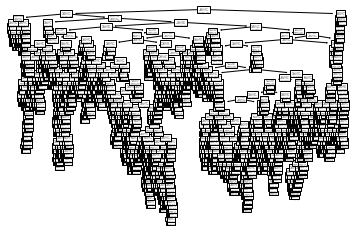

In [103]:
from sklearn import tree
tree.plot_tree(clf)

In [104]:
# Multiple Regression
from sklearn import datasets, linear_model, metrics

Coefficients: 
 [-8.69887453e-03  6.70422230e-03  7.99831659e-03 -3.13357497e-03
 -1.70154826e-03 -1.70185435e-03 -8.60249426e-03  2.40170443e-03
 -2.35496976e-02 -1.51504752e-02 -1.00314601e-02 -1.36934913e-02
  1.32637330e-03 -7.25145716e-03 -5.47824004e-04 -3.57744915e-03
  2.76657996e-03 -1.19908664e-03 -3.76199439e-05  7.43844209e-03
 -2.12091658e-03  3.72453362e-03 -5.60539887e-03  9.76985199e-04]
Variance score: 0.023123480118352857


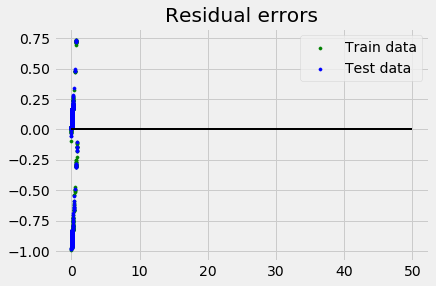

In [105]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8365162989792558
